<a href="https://colab.research.google.com/github/Darkniteman/My-Computer-Vision-Journey/blob/main/Blue_Screen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import cv2
import matplotlib.image as implt
import numpy as np
import matplotlib.pyplot as plt

array([[[246,  49,   3],
        [246,  49,   3],
        [246,  49,   3],
        ...,
        [246,  49,   3],
        [246,  49,   3],
        [246,  49,   3]],

       [[246,  49,   3],
        [246,  49,   3],
        [246,  49,   3],
        ...,
        [246,  49,   3],
        [246,  49,   3],
        [246,  49,   3]],

       [[246,  49,   3],
        [246,  49,   3],
        [246,  49,   3],
        ...,
        [246,  49,   3],
        [246,  49,   3],
        [246,  49,   3]],

       ...,

       [[246,  49,   3],
        [246,  49,   3],
        [246,  49,   3],
        ...,
        [246,  49,   3],
        [246,  49,   3],
        [246,  49,   3]],

       [[246,  49,   3],
        [246,  49,   3],
        [246,  49,   3],
        ...,
        [246,  49,   3],
        [246,  49,   3],
        [246,  49,   3]],

       [[246,  49,   3],
        [246,  49,   3],
        [246,  49,   3],
        ...,
        [246,  49,   3],
        [246,  49,   3],
        [246,  49,   3]]], dtype=uint8)
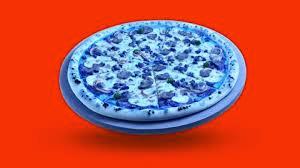

In [92]:
image = cv2.imread('bluepizza.jpeg')
image

After uploading the photo the computer see it in format BGR so we need to change this format into RGB.

So we can make a copy of the image to change it as we need.

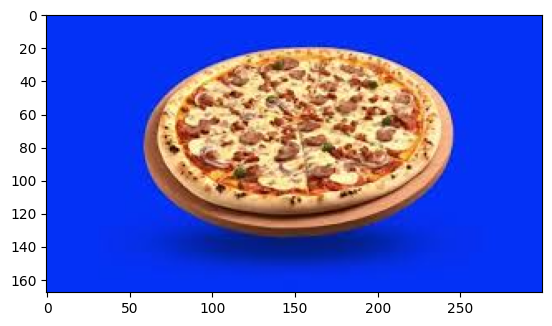

In [93]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

**Lower bound**
We want to include only the strong blue shades, so:

Red (R) = 0 (no red to avoid purple shades)

Green (G) = 0 (no green to avoid cyan shades)

Blue (B) = a low value (e.g., 100 or more) to capture dark blue


---


**Upper bound**

We allow lighter blues, so we increase other colors slightly:

Red (R) = some value (e.g., 100) to allow light blue variations

Green (G) = some value (e.g., 100) to include sky-blue shades

Blue (B) = 255 (maximum blue intensity)

In [94]:
lower_blue=np.array([0,0,100])
upper_blue=np.array([100,100,255])

(168, 300)

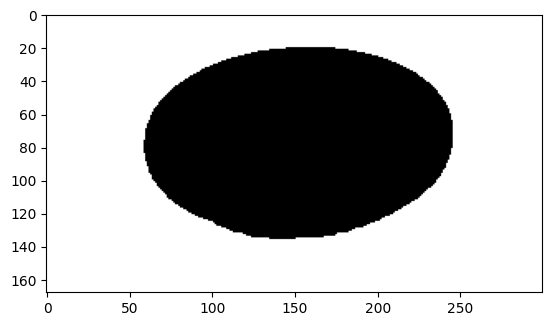

In [95]:
#Creating a mask
mask=cv2.inRange(image_copy,lower_blue,upper_blue)
plt.imshow(mask,cmap='gray')
mask.shape

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
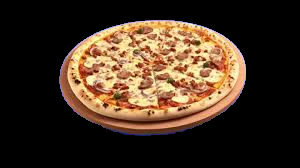

In [96]:
image_copy[mask!=0]=[0,0,0]
image_copy

In [97]:
background=cv2.imread('water.jpeg')
background.shape

(183, 275, 3)

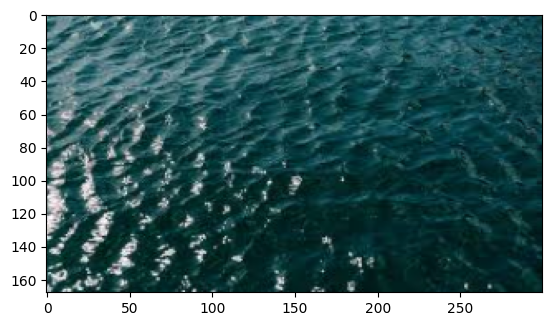

In [98]:
#Background without pizza
background = cv2.imread('water.jpeg')
background = cv2.cvtColor(background,cv2.COLOR_BGR2RGB)
background = cv2.resize(background, (image_copy.shape[1], image_copy.shape[0]))
cropped_background = background[0:mask.shape[0],0:mask.shape[1]]
plt.imshow(cropped_background)

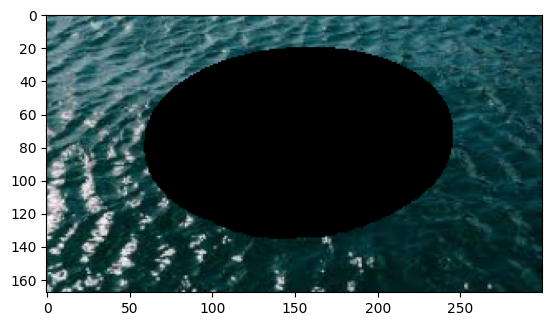

In [99]:
cropped_background[mask==0]=[0,0,0]
plt.imshow(cropped_background)

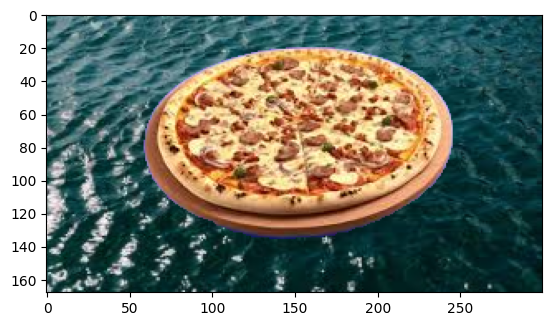

In [100]:
complete_image=cropped_background+image_copy
plt.imshow(complete_image)